In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"   # 👈 Stops the KMeans memory leak warning

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv("C:\\Users\\LAPTOPINN\\Downloads\\Mall_Customers.csv")
print(df.head())   

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [7]:
print(df.describe())     

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


## Select features

In [10]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

## Scale the features

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Find best number of clusters (k)

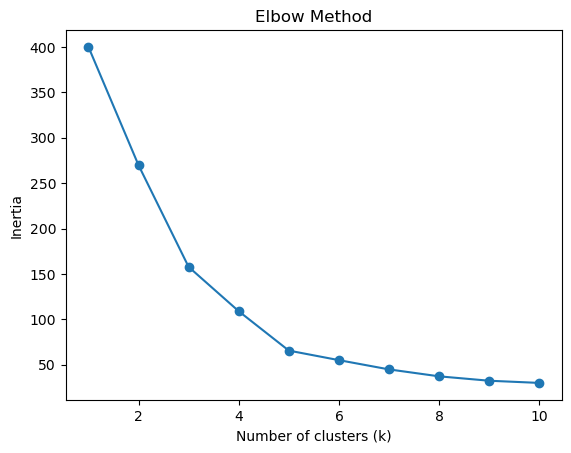

In [16]:
inertias = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

## Silhouette Score

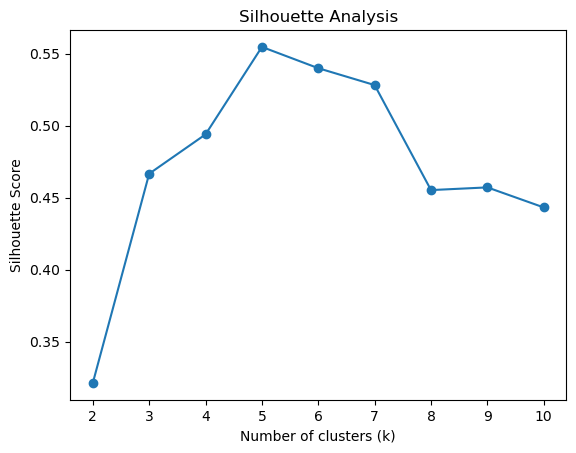

In [19]:
sil_scores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

## Apply K-Means with chosen k

In [22]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

## Visualize the clusters

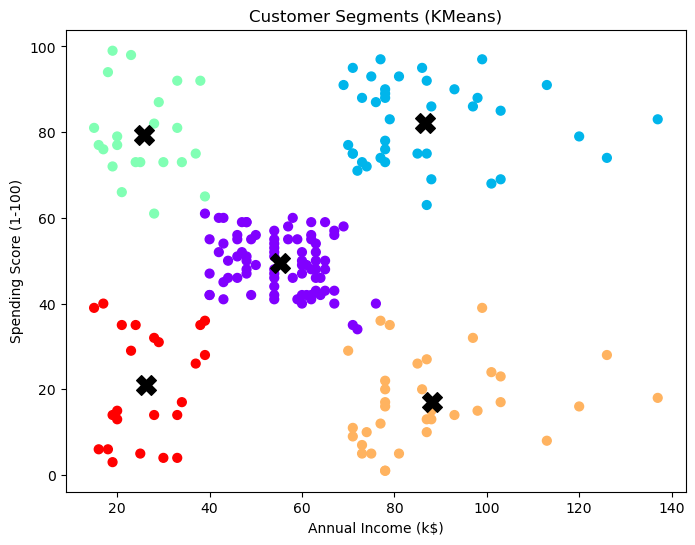

In [25]:
# Cluster centers (convert back to original scale for plotting)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(8,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster'], cmap='rainbow', s=40)
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, marker='X') # centers
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments (KMeans)')
plt.show()

## Analyze clusters (average spending per cluster)

In [28]:
cluster_profile = df.groupby('Cluster').agg(
    count=('CustomerID', 'count'),
    avg_income=('Annual Income (k$)', 'mean'),
    avg_spending=('Spending Score (1-100)', 'mean')
).round(2)

print(cluster_profile)

         count  avg_income  avg_spending
Cluster                                 
0           81       55.30         49.52
1           39       86.54         82.13
2           22       25.73         79.36
3           35       88.20         17.11
4           23       26.30         20.91


## Try DBSCAN

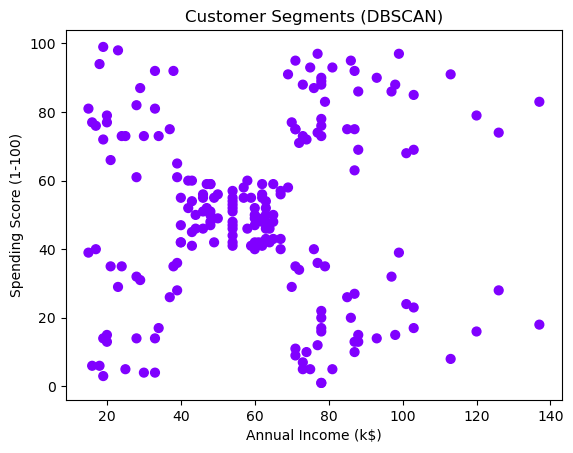

In [31]:
db = DBSCAN(eps=0.8, min_samples=5).fit(X_scaled)
df['DBSCAN_Cluster'] = db.labels_

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['DBSCAN_Cluster'], cmap='rainbow', s=40)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments (DBSCAN)')
plt.show()